In [64]:
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import pytesseract
import numpy as np
import sys,os  
from PIL import Image,ImageDraw

ImportError: No module named cv2.cv

In [40]:
#二值判断,如果确认是噪声,用改点的上面一个点的灰度进行替换  
#该函数也可以改成RGB判断的,具体看需求如何  
def getPixel(image,x,y,G,N):  
    L = image.getpixel((x,y))  
    if L > G:  
        L = True  
    else:  
        L = False  
  
    nearDots = 0  
    if L == (image.getpixel((x - 1,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x - 1,y)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x - 1,y + 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x,y + 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y - 1)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y)) > G):  
        nearDots += 1  
    if L == (image.getpixel((x + 1,y + 1)) > G):  
        nearDots += 1  
  
    if nearDots < N:  
        return image.getpixel((x,y-1))  
    else:  
        return None  
  
# 降噪   
# 根据一个点A的RGB值，与周围的8个点的RBG值比较，设定一个值N（0 <N <8），当A的RGB值与周围8个点的RGB相等数小于N时，此点为噪点   
# G: Integer 图像二值化阀值   
# N: Integer 降噪率 0 <N <8   
# Z: Integer 降噪次数   
# 输出   
#  0：降噪成功   
#  1：降噪失败   
def clearNoise(image,G,N,Z):  
    draw = ImageDraw.Draw(image)  
  
    for i in xrange(0,Z):  
        for x in xrange(1,image.size[0] - 1):  
            for y in xrange(1,image.size[1] - 1):  
                color = getPixel(image,x,y,G,N)  
                if color != None:  
                    draw.point((x,y),color)  

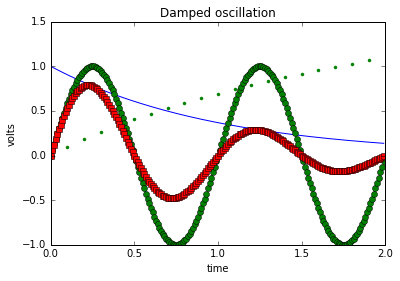

In [23]:
t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = plt.plot(t2, np.exp(-t2))
l2, l3 = plt.plot(t2, np.sin(2 * np.pi * t2), '--go', t1, np.log(1 + t1), '.')
l4, = plt.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 'rs-.')

plt.xlabel('time')
plt.ylabel('volts')
plt.title('Damped oscillation')

plt.show()

In [3]:
image = Image.open('./img/test.png')
vcode = pytesseract.image_to_string(image)
print vcode

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


In [18]:
#20150607105303_kcE3t.jpeg
image = Image.open('./img/20150607105303_kcE3t.jpeg')
text = pytesseract.image_to_string(image,lang="chi_sim")
print text

经历不同哪来的感同身受 每个人都有自己
的观念, 人各有别， 女口果每个人的话你都耿
耿于怀， 你这一生都会被困住。 这世上多的
是伤口撒盐的畜生而不是救死扶伤的医生，
别指望有人能心疼你为你抗下所有, 你要做
的只不过是迎着冷眼和嘲笑一直走下去, 披
荆斩棘， 痛苦自己扛, 眼泪自己尝。

生活不过一杯酒， 醉完了还有路要走。


In [18]:
def binary(f):                #图像的二值化处理
    print f
    img = Image.open(f)
    #img = img.convert('1')
    img = img.convert("RGBA")  #参考文章中无该行，无该行，我这里会报错
    pixdata = img.load()
    for y in xrange(img.size[1]):
        for x in xrange(img.size[0]):
            if pixdata[x, y][0] < 90:
                pixdata[x, y] = (0, 0, 0, 255)
    for y in xrange(img.size[1]):
        for x in xrange(img.size[0]):
            if pixdata[x, y][1] < 136:
                pixdata[x, y] = (0, 0, 0, 255)
    for y in xrange(img.size[1]):
        for x in xrange(img.size[0]):
            if pixdata[x, y][2] > 0:
                pixdata[x, y] = (255, 255, 255, 255)
    return img

In [81]:
#image = binary('./img/number1.png')
image = Image.open('./img/number1.png')
#x=image.convert('L')
size = 128, 128
image=image.resize(size)
text = pytesseract.image_to_string(image,config="-c tessedit_char_whitelist=0123456789")
#text = pytesseract.image_to_string(image)
print text

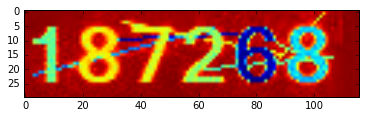

In [70]:
image = Image.open('./img/number1.png')
image=image.convert('L')
#image = binary('./img/number1.png')
#将图片转换成灰度图片  
#x = image.convert("1")  
#plt.imshow(x)
#去噪,G = 50,N = 4,Z = 4  
#clearNoise(x,50,4,4)
#x.save('./img/temp.png')
#y = Image.open('./img/temp.png')
plt.imshow(image)
#text = pytesseract.image_to_string(y,config="-c tessedit_char_whitelist=0123456789")
#text = pytesseract.image_to_string(image)
#print text